In [1]:
# Load the data
# Clean the data
# Feature Enginnering
# Preproccessing
# Modelling
# RandomSearching
# GridSearchings
# Final Project Repat

In [2]:
import random
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import (
    StandardScaler,
    RobustScaler,
    MinMaxScaler,
    MaxAbsScaler,
    OneHotEncoder,
    LabelEncoder,
    Normalizer,
)
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,VotingRegressor,BaggingRegressor,RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score,precision_score,f1_score,recall_score
import pickle

In [3]:
import wandb
PROJECT_NAME = 'House-Prices-Advanced-Regression-Techniques-V2'
def valid(model,X,y,val=False):
    y_test = y
    y_preds = model.predict(X)
    if val is True:
        results = {
            'Val Accuracy':model.score(X,y),
            'Val MAE':mean_absolute_error(y_test,y_preds),
            'Val MSE':mean_squared_error(y_test,y_preds),
        }
    else:
        results = {
            'Accuracy':model.score(X,y),
            'MAE':mean_absolute_error(y_test,y_preds),
            'MSE':mean_squared_error(y_test,y_preds),
        }
    return results
def fit(model,X_train,X_test,y_train,y_test,name):
    wandb.init(project=PROJECT_NAME,name=name)
    model = model
    model.fit(X_train,y_train)
    print('Logging')
    wandb.log(valid(model,X_train,y_train))
    wandb.log(valid(model,X_test,y_test,True))
    print('Saving')
    pickle.dump(model,open(f'./models/model-{name}.pkl','wb'))
    print('Making Submissions')
    make_submission(model,name)
    return model
def make_submission(model,name):
    data = pd.read_csv('./test.csv')
    for col_name,col_missing_num in zip(data.columns,data.isna().sum()):
        try:
            data[col_name].fillna(data[col_name].median(),inplace=True)
        except:
            data[col_name].fillna(random.choice(data[col_name].dropna().tolist()),inplace=True)
    ids = data['Id']
    list_of_cols_to_keep_make_sub = list_of_cols_to_keep.copy()
    list_of_cols_to_keep_make_sub.remove('SalePrice')
    data = data[list_of_cols_to_keep_make_sub]
    preds = model.predict(data)
    df = pd.DataFrame({'Id':ids,'SalePrice':preds})
    df.to_csv(f'./submissions/submisssion-{name}.csv',index=False)
    return df

In [4]:
data = pd.read_csv('./train.csv')

In [5]:
for col_name,col_missing_num in zip(data.columns,data.isna().sum()):
    try:
        data[col_name].fillna(data[col_name].median(),inplace=True)
    except:
        data[col_name].fillna(random.choice(data[col_name].dropna().tolist()),inplace=True)

In [6]:
def object_to_int(data,col):
    labels = {}
    idx = -1
    for label in data[col]:
        if label not in list(labels.keys()):
            idx += 1
            labels[label] = idx
    return labels

In [7]:
corr_matrix = data.corr()

In [8]:
new_dict = {}
for key,val in zip(corr_matrix.to_dict().keys(),corr_matrix.to_dict().values()):
    for key_inside,val_inside in zip(val.keys(),val.values()):
        if val_inside > -0.0:
            try:
                new_dict[key][key_inside] = val_inside
            except:
                new_dict[key] = {}
                new_dict[key][key_inside] = val_inside
list_of_cols_to_keep = []
for key,val in zip(new_dict.keys(),new_dict.values()):
    for key_inside,val_inside in zip(val.keys(),val.values()):
        if key_inside in list_of_cols_to_keep:
            pass
        else:
            list_of_cols_to_keep.append(key_inside)

In [9]:
len(list_of_cols_to_keep)

38

In [10]:
data = data[list_of_cols_to_keep]

In [11]:
len(data.columns)

38

In [12]:
data.dtypes

Id                 int64
MSSubClass         int64
OverallCond        int64
1stFlrSF           int64
2ndFlrSF           int64
GrLivArea          int64
BsmtFullBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
GarageCars         int64
GarageArea         int64
EnclosedPorch      int64
ScreenPorch        int64
PoolArea           int64
MoSold             int64
YrSold             int64
OverallQual        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
LowQualFinSF       int64
GarageYrBlt      float64
LotFrontage      float64
LotArea            int64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Fireplaces         int64
WoodDeckSF         int64
OpenPorchSF        int64
3SsnPorch          int64
SalePrice          int64
BsmtHalfBath       int64
MiscVal            int64
dtype: object

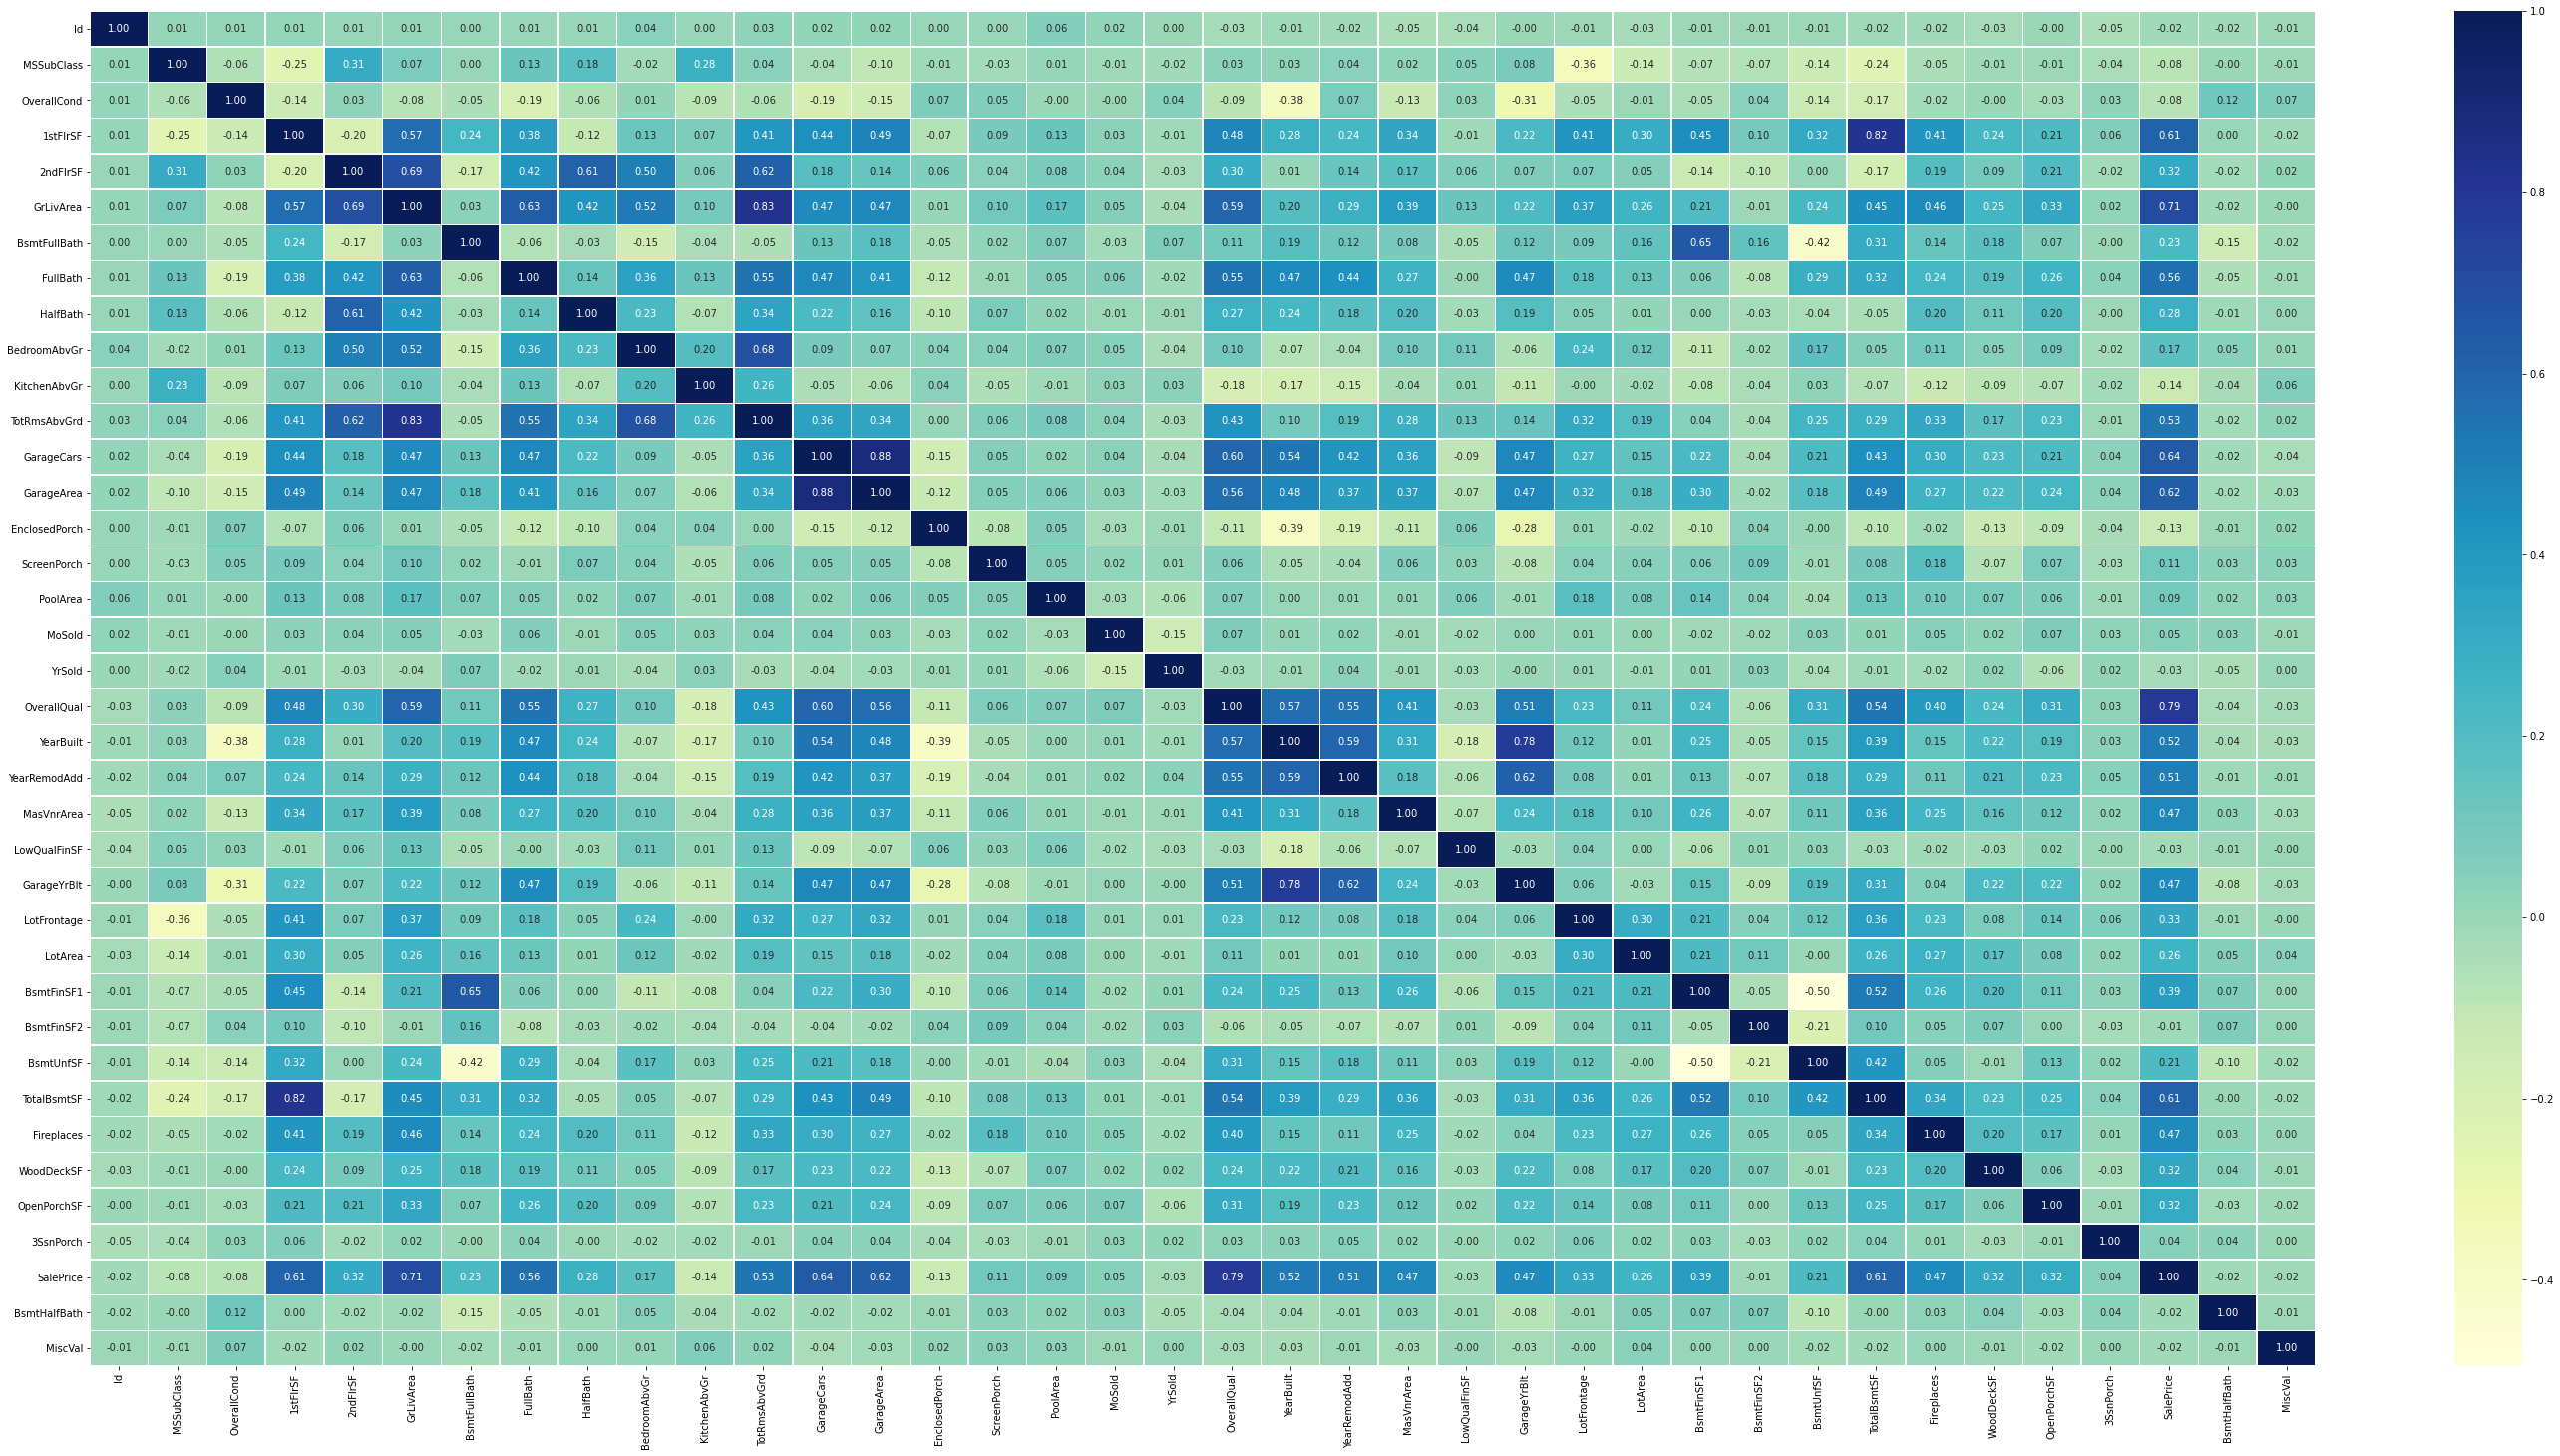

In [13]:
corr_matrix = data.corr()
fig,ax = plt.subplots(figsize=(50,25))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt='.2f',cmap='YlGnBu')

In [14]:
X = data.drop('SalePrice',axis=1)
y = data['SalePrice']

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.125)

In [17]:
fit(GradientBoostingRegressor(),X_train,X_test,y_train,y_test,name='baseline')

Accuracy,0.97885
MAE,6751.29422
MSE,135481955.20081
_runtime,8
_timestamp,1628526206
_step,1
Val Accuracy,0.90685
Val MAE,15868.67885
Val MSE,521202011.74134


Accuracy,▁
MAE,▁
MSE,▁
_runtime,▁▁
_timestamp,▁▁
_step,▁█
Val Accuracy,▁
Val MAE,▁
Val MSE,▁


wandb: wandb version 0.11.2 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Logging
Saving
Making Submissions


GradientBoostingRegressor()